In [3]:
import  numpy as np
import pandas as pd

In [4]:
df = pd.read_csv('titanic.csv')

In [5]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
df = df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis=1)

In [7]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500
...,...,...,...,...,...
886,0,2,male,27.0,13.0000
887,1,1,female,19.0,30.0000
888,0,3,female,NaN,23.4500
889,1,1,male,26.0,30.0000


In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [9]:
handle = df['Age'].median()

In [10]:
df = df.fillna(handle)

In [11]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

In [12]:
import matplotlib.pyplot as plt

In [13]:
import seaborn as sns

<Axes: xlabel='Survived', ylabel='count'>

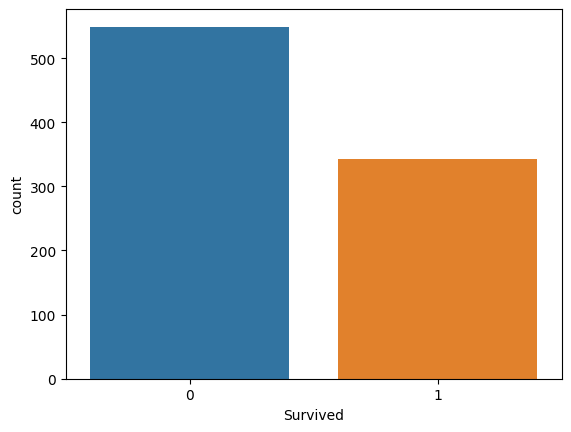

In [14]:
sns.countplot(x='Survived',data=df)

<Axes: xlabel='Sex', ylabel='count'>

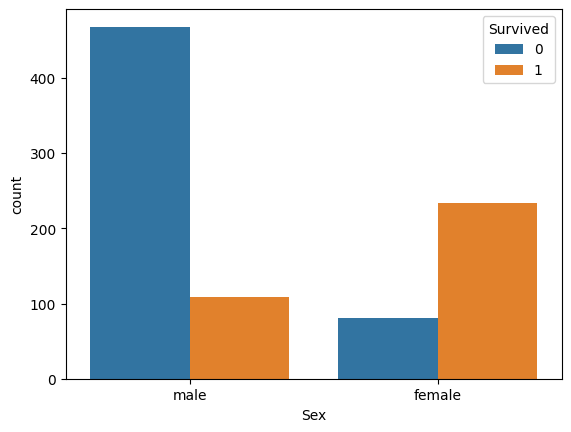

In [15]:
sns.countplot(x='Sex',hue='Survived',data=df)

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
for column in df.columns:
    if df[column].dtypes == np.number:
        continue
    df[column] = LabelEncoder().fit_transform(df[column])

C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_8072\2285443240.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtypes == np.number:
C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_8072\2285443240.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtypes == np.number:
C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_8072\2285443240.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtypes == np.number:
C:\Users\Ghost Codm\AppData\Local\Temp\ipykernel_8072\2285443240.py:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if 

In [21]:
df

,Survived,Pclass,Sex,Age,Fare
0,0,2,1,22.0,7.2500
1,1,0,0,38.0,71.2833
2,1,2,0,26.0,7.9250
3,1,0,0,35.0,53.1000
4,0,2,1,35.0,8.0500
...,...,...,...,...,...
886,0,1,1,27.0,13.0000
887,1,0,0,19.0,30.0000
888,0,2,0,28.0,23.4500
889,1,0,1,26.0,30.0000


In [22]:
x = df.drop(['Survived'],axis=1)

In [23]:
y = df['Survived']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=.25,random_state=42)

In [27]:
from sklearn.tree import DecisionTreeClassifier


In [28]:
model = DecisionTreeClassifier()

In [29]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier()

In [30]:
model.score(xtest,ytest)

0.7443946188340808

In [34]:
pred = model.predict([[0,0,38.0,7.9250]])

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [35]:
pred

array([1], dtype=int64)